# Homework 02: Monoalphabetic Ciphers and Cryptanalysis

At this point, we know enough about monoalphabetic substitution ciphers and how to analyze them to complete a homework to showcase you also know enough Python to program them. If you've been keeping up with the activities for each lesson, this homework should not take you long at all to complete!

## Part 1: Programming With Loops, Functions, and Conditional Branches

### Question 1.1: Triangular Numbers

A *triangular number*, $T_n$ is a number obtained by adding all positive integers less than or equal to $n$. For example:
  * $T_1 = 1$ 
  * $T_2 = 3 = 1 + 2$
  * $T_3 = 6 = 1 + 2 + 3$
  * $T_4 = 10 = 1 + 2 + 3 + 4$

are all triangular numbers.

In the code cell below write a function named `triangular_number` that generates triangular numbers and **returns** them as integers. The function only needs to work for non-negative integer inputs (0 or above).

**Hint:** A loop should make short work of this!

In [1]:
def triangular_number(n):
    # YOUR CODE GOES BELOW THIS LINE
    
    # BEGIN SOLUTION NO PROMPT
    sum = 0
    for i in range(n+1):
        sum += i
    return sum
    # END SOLUTION

In [2]:
""" # BEGIN TEST CONFIG
failure_message: Make sure you are using a return statement in your function
""" # END TEST CONFIG
triangular_number(0) != None

True

In [3]:
triangular_number(0)

0

In [4]:
triangular_number(1)

1

In [5]:
triangular_number(3)

6

In [6]:
triangular_number(10)

55

### Question 1.2: Conditional Branches

In the code cell below, write a function named `integer_compare()` that compares two integer values and returns a string depending on their relative size.

The string the function should **return** should be:
  * `'x is larger than y'` if $x \gt y$
  * `'y is larger than x'` if $x \lt y$ 
  * `'x and y are equal'` if $x = y$

In [7]:
def integer_compare(x, y):
    # YOUR CODE GOES BELOW THIS LINE
    
    # BEGIN SOLUTION NO PROMPT
    if x > y: 
        return 'x is larger than y'
    elif y > x:
        return 'y is larger than x'
    elif x == y:
        return 'x and y are equal'
    # END SOLUTION

In [8]:
# try out your code here
print( integer_compare(3, 7) )

y is larger than x


In [9]:
integer_compare(3, 7)

'y is larger than x'

In [10]:
integer_compare(5, 1)

'x is larger than y'

In [11]:
integer_compare(4, 4)

'x and y are equal'

## Part Two: Function Checkpoint

You've been asked to write several functions throughout the course so far. Please use that work to quickly provide code for the following functions.

### Question 2.1: `text_clean`

Text clean is the function we use to prepare text for enciphering / deciphering. As a reminder, this function takes in a string `text`, makes all of the characters uppercase,  then only returns those characters that are also in the `LETTERS` string. By default, `LETTERS` only contains the 26 uppercase English letters but this value could be overridden by providing an argument to the `LETTERS` parameter.

In [12]:
def text_clean( text, LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    """
    Arguments:
        text (str): a piece of text for cleaning
        LETTERS (str, optional): defines the alphabet of allowable characters
    Returns:
        (str): text with only the characters also found in LETTERS
               lower-case letters in text will be made upper-case  
    """
    # YOUR CODE GOES BELOW THIS LINE
    
    # BEGIN SOLUTION NO PROMPT
    cleaned_text = '' 
    
    for character in text: 
        if character.upper() in LETTERS:
            cleaned_text += character.upper()
    
    return cleaned_text 
    # END SOLUTION

In [13]:
""" # BEGIN TEST CONFIG
failure_message: Make sure your output is uppercase letters only.
""" # END TEST CONFIG
text_clean('heLlO')

'HELLO'

In [14]:
""" # BEGIN TEST CONFIG
failure_message: non letter characters (digits and punctuation) should be removed
""" # END TEST CONFIG
text_clean('this is a m3ssage!?')

'THISISAMSSAGE'

In [15]:
""" # BEGIN TEST CONFIG
failure_message: Only letters specified in the LETTERS string should remain in the output
""" # END TEST CONFIG
text_clean('hello', LETTERS='ABCDEFGH')

'HE'

### Question 2.2: `text_block`

This function should take in a string and return the same exact string, only grouped into blocks of `size` characters. By default it should be blocks of 5 characters, but this could be overridden by passing a different integer argument to the parameter `size`.

You can assume that any input to this function is already "clean" so you don't need to clean `text` against a `LETTERS` string inside this function.

In [16]:
def text_block( text, size = 5 ):
    """
    Arguments:
        text (str): text to block
        size (int, optional): # of characters in a block
    Returns:
        (str): text blocked into groups of specified size
    """
    # YOUR CODE GOES BELOW THIS LINE
    
    # BEGIN SOLUTION NO PROMPT
    blocked_text = '' 
    
    for character in text: 
        if len(blocked_text.replace(' ', '') ) % size == 0 and len(blocked_text) != 0:
            blocked_text += ' '

        blocked_text += character
    
    return blocked_text
    # END SOLUTION

In [17]:
""" # BEGIN TEST CONFIG
failure_message: Check to make sure that you meet the basic specifications of this function
""" # END TEST CONFIG
text_block('TESTMESSAGE')

'TESTM ESSAG E'

In [18]:
""" # BEGIN TEST CONFIG
failure_message: If there are a (multiple of size) characters, the message should not end in a space.
""" # END TEST CONFIG
text_block('0123456789') != '01234 56789 '

True

In [19]:
""" # BEGIN TEST CONFIG
failure_message: Make sure you are using the size parameter to produce your blocks
""" # END TEST CONFIG
text_block('012345', size=4)

'0123 45'

In [20]:
""" # BEGIN TEST CONFIG
failure_message: If there are a (multiple of size) characters, the message should not end in a space.
""" # END TEST CONFIG
text_block('01234567', size=4) != '0123 4567'

False

### Question 2.3: `Caesar`

The `caesar` function takes in a key and message and returns the enciphered or deciphered version of that message depending on if the parameter `encipher` is set to `True` or `False`. This function should use `text_clean` to clean the message before attempting to encipher or decipher the message.

Strings returned that are ciphertext should only contain those characters specified in `LETTERS` and should be blocked into groups of 5 characters.

Strings returned that are plaintext should only contain those characters specified in `LETTERS`, but lowercase, and should **not** be blocked into groups.

In [21]:
def caesar(key, message, encipher=True, LETTERS='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    """
    Arguments:
        key (int): an integer used as the key to encipher the message
        message (str): the message to encipher
        encipher (bool, optional): True --> encipher the message, False --> decipher
        LETTERS (str, optional): defines the alphabet of allowable characters
    Returns:
        (str): encrypted / decrypted version of message
    """
    # YOUR CODE GOES BELOW THIS LINE
    
    # BEGIN SOLUTION NO PROMPT
    message = text_clean(message, LETTERS)
    output = '' 
    
    if encipher == True:
        for plaintext_character in message:
            plaintext_numerical = LETTERS.find(plaintext_character)
            ciphertext_numerical = (plaintext_numerical + key) % len(LETTERS)
            ciphertext_character = LETTERS[ ciphertext_numerical ]
            output += ciphertext_character
        return text_block( output )
    else:
        for ciphertext_character in message:
            ciphertext_numerical = LETTERS.find( ciphertext_character )
            plaintext_numerical = (ciphertext_numerical - key) % len(LETTERS)
            plaintext_character = LETTERS[ plaintext_numerical ]
            output += plaintext_character   
        return output.lower()
    # END SOLUTION

In [22]:
""" # BEGIN TEST CONFIG
failure_message: Make sure you clean the text before encryption / decryption
""" # END TEST CONFIG
caesar(3, 'hello!') == caesar(3, 'HELLO')

True

In [23]:
""" # BEGIN TEST CONFIG
failure_message: Make sure you are using the LETTERS argument when cleaning text
""" # END TEST CONFIG
len(caesar(5, 'hello!', LETTERS='ABCDEFGH'))

2

In [24]:
""" # BEGIN TEST CONFIG
failure_message: Make sure you are blocking the text when encrypting
""" # END TEST CONFIG
len(caesar(17, 'test message'))

13

In [25]:
""" # BEGIN TEST CONFIG
failure_message: Not encrypting correctly with default settings
""" # END TEST CONFIG
caesar(14, 'test message')

'HSGHA SGGOU S'

In [26]:
""" # BEGIN TEST CONFIG
failure_message: Not decrypting correctly with default settings
""" # END TEST CONFIG
caesar(14, 'HSGHA SGGOU S', encipher=False)

'testmessage'

In [27]:
""" # BEGIN TEST CONFIG
failure_message: Not encrypting correctly with non-default LETTERS
""" # END TEST CONFIG
caesar(5, 'bag', LETTERS='ABCDEFGH')

'GFD'

In [28]:
""" # BEGIN TEST CONFIG
failure_message: Not decrypting correctly with non-default LETTERS
""" # END TEST CONFIG
caesar(5, 'GFD', encipher=False, LETTERS='ABCDEFGH')

'bag'

### Question 2.4: `affine`

The `affine` function takes in a multiplicative key, an additive key, and message and returns the affine enciphered or deciphered version of that message depending on if the parameter `encipher` is set to `True` or `False`. This function should use `text_clean` to clean the message before attempting to encipher or decipher the message. The decipher process will need to compute a multiplicative inverse in the mod of the length of LETTERS. You can use the provided `multiplicative_inverse` function to perform this step.

Strings returned that are ciphertext should only contain those characters specified in `LETTERS` and should be blocked into groups of 5 characters.

Strings returned that are plaintext should only contain those characters specified in `LETTERS`, but lowercase, and should **not** be blocked into groups.

In [29]:
def multiplicative_inverse(n, m):
    row1 = [m, 1, 0] 
    row2 = [n, 0, 1] 
    
    while row2[0] != 1: 
        k = row1[0] // row2[0] 

        row3 = [ row1[0] - k*row2[0], row1[1] - k*row2[1], row1[2] - k*row2[2] ] 

        row1 = row2 
        row2 = row3 
    
    inverse = row2[2] % m 
    
    return inverse

In [30]:
def affine(km, ka, message, encipher=True, LETTERS='ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    """
    Arguments:
        km (int): an integer used as the multiplicative key to encipher the message
        ka (int): an integer used as the additive key to encipher the message
        message (str): the message to encipher
        encipher (bool, optional): True --> encipher the message, False -- decipher
        LETTERS (str, optional): defines the alphabet of allowable characters
    Returns:
        (str): encrypted / decrypted version of message
    """
    # YOUR CODE GOES BELOW THIS LINE
    
    # BEGIN SOLUTION NO PROMPT
    message = text_clean(message, LETTERS)
    output = ''
    
    if encipher == True:
        for plaintext_character in message:
            plaintext_numerical = LETTERS.find(plaintext_character)
            ciphertext_numerical = (km * plaintext_numerical + ka) % len(LETTERS)
            ciphertext_character = LETTERS[ ciphertext_numerical ]
            output += ciphertext_character
        return text_block( output )
    else:
        for ciphertext_character in message:
            ciphertext_numerical = LETTERS.find( ciphertext_character )
            plaintext_numerical = (ciphertext_numerical - ka) * multiplicative_inverse(km, len(LETTERS)) % len(LETTERS)
            plaintext_character = LETTERS[ plaintext_numerical ]
            output += plaintext_character   
        return output.lower()
    # END SOLUTION 

In [31]:
""" # BEGIN TEST CONFIG
failure_message: Make sure you clean the text before encryption / decryption
""" # END TEST CONFIG
affine(3, 10, 'hello!') == affine(3, 10, 'HELLO')

True

In [32]:
""" # BEGIN TEST CONFIG
failure_message: Make sure you are using the LETTERS argument when cleaning text
""" # END TEST CONFIG
len(affine(3, 10, 'hello!', LETTERS='ABCDEFGH'))

2

In [33]:
""" # BEGIN TEST CONFIG
failure_message: Make sure you are blocking the text when encrypting
""" # END TEST CONFIG
len(affine(3, 10, 'test message'))

13

In [34]:
""" # BEGIN TEST CONFIG
failure_message: Not encrypting correctly with default settings
""" # END TEST CONFIG
affine(7, 2, 'test message')

'FEYFI EYYCS E'

In [35]:
""" # BEGIN TEST CONFIG
failure_message: Not decrypting correctly with default settings
""" # END TEST CONFIG
affine(7, 2, 'FEYFI EYYCS E', encipher=False)

'testmessage'

In [36]:
""" # BEGIN TEST CONFIG
failure_message: Not encrypting correctly with non-default LETTERS
""" # END TEST CONFIG
affine(19, 3, 'bag', LETTERS='ABCDEFGH')

'GDF'

In [37]:
""" # BEGIN TEST CONFIG
failure_message: Not decrypting correctly with non-default LETTERS
""" # END TEST CONFIG
affine(19, 3, 'GDF', encipher=False, LETTERS='ABCDEFGH')

'bag'

### Question 2.5: `chi_squared_score`

The `chi_squared_score` function should take in a candidate plaintext, clean it, and then score it using the $\chi^2$ method. Your function should use the provided letter frequencies in the list `standard_frequencies`, since there is no agreed upon set of frequencies of each letter in the English language.

In [38]:
def chi_squared_score( candidate, LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' ):
    candidate = text_clean( candidate, LETTERS )
    standard_frequencies = [0.08167, 0.01492, 0.02782, 0.04253, 0.12702, 0.02228, 0.02015, 0.06094, 0.06966, 0.00153, 0.00772, 0.04025, 0.02406, 0.06749, 0.07507, 0.01929, 0.00095, 0.05987, 0.06327, 0.09056, 0.02758, 0.00978, 0.02360, 0.00150, 0.01974, 0.00074]
    # YOUR CODE GOES BELOW THIS LINE
    
    # BEGIN SOLUTION NO PROMPT
    count = [] 
    expected  = [] 
    sub_scores = [] 
    
    length_of_candidate = len(candidate) 
    
    for char in LETTERS: 
        count.append( candidate.count(char) ) 
        
    for i in standard_frequencies:
        expected.append(i * length_of_candidate )
        
    for i in range(len(LETTERS)):
        sub_scores.append( (count[i] - expected[i] )**2 / expected[i])
    
    score = sum(sub_scores)
    
    return score

    # END SOLUTION

In [39]:
""" # BEGIN TEST CONFIG
failure_message: Make sure you clean each candidate, just to be safe
""" # END TEST CONFIG
chi_squared_score('hello!') == chi_squared_score('HELLO')

True

In [40]:
""" # BEGIN TEST CONFIG
failure_message: You are not computing the correct score for a small message
""" # END TEST CONFIG
round( chi_squared_score('HELLO'), 5)

22.39638

In [41]:
""" # BEGIN TEST CONFIG
failure_message: You are not computing the correct score for a long message
""" # END TEST CONFIG
round( chi_squared_score('JDFKJHGKJHSDGKJFHGKEHWBHJBFKJHDSFBDKJHFGKUYEGWYHGKALKJHIUYERIOUWEBVNMCBXMQEORIUE'), 5 )

703.7612

## Part 3: Cryptanalysis

You'll be using the ciphertext contained in `hw01.txt` to complete the following questions. Run the cell below to load it as the string `ciphertext`. The first 100 characters will be printed to verify it's been loaded correctly.

In [3]:
with open('hw01.txt') as f: 
    ciphertext = f.read() 

print(ciphertext[0:100], '...')

OIJMK IAWJG TFOIJ MKIAW JOJMW FGLMO WAVWQ GAAKC IOVAI JBJMA WFRVG RNKJR VWCKC WTRAV WSIMR WNKJE KRVK ...


### Question 3.1

In the cell below, create a list of frequencies for each character in `LETTERS`. Then, use that list to create a bar chart that displays the frequency of the 26 English letters in the current `ciphertext` message. Each frequency should be between 0 and 1 (a proportion, not a percentage) and the bar chart should have labels for both the x-axis and y-axis, as well as a title for the entire chart.

This question will be graded manually, but there are a few grader checks provided to help you check for some common mistakes.

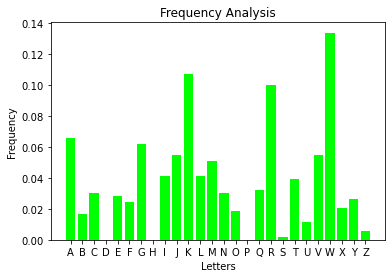

In [7]:
import matplotlib.pyplot as plt
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
frequencies = []
ciphertext_length = len(ciphertext.replace(' ','')) # SOLUTION
# YOUR CODE GOES BELOW THIS LINE

# BEGIN SOLUTION NO PROMPT
for char in LETTERS:
    frequencies.append( ciphertext.count(char) / ciphertext_length )
# END SOLUTION    
    
# Everything above this comment should be about computing the frequencies    
# Everything below this comment should be about creating the bar chart

plt.bar(list(LETTERS), frequencies, color = "lime") # SOLUTION
plt.xlabel('Letters') # SOLUTION
plt.ylabel('Frequency') # SOLUTION
plt.title('Frequency Analysis') # SOLUTION

plt.show() # SOLUTION

In [44]:
""" # BEGIN TEST CONFIG
failure_message: When computing the length of the message, make sure you are removing the spaces before you count.
""" # END TEST CONFIG
ciphertext_length

530

In [45]:
""" # BEGIN TEST CONFIG
failure_message: The frequencies list should sum to 1.0. If it doesn't, are you over or under counting?
""" # END TEST CONFIG
round( sum(frequencies), 5)

1.0

In [46]:
""" # BEGIN TEST CONFIG
failure_message: The ciphertext should have 0.06604 (6.604%) of the message as the character A
""" # END TEST CONFIG
round( frequencies[0], 5)

0.06604

### Question 3.2

Use the `chi_squared_score` function and the provided loops to score all 312 possible candidates for the correct plaintext. Store each of the 312 individual results to a variable named `one_result` in the format:

`[<multiplicative-key>, <additive-key>, <chi-squared score>]` 

which should then appended to the list named `results` which will eventually hold all 312 result lists.

The last 4 lines of code will sort `results` by the chi-squared score as long as `results` is constructed correctly, and then extract the most likely km and ka values from the top single result.

In [47]:
results = []

for km in [1, 3, 5, 7, 9, 11, 15, 17, 19, 21, 23, 25]:
    for ka in range(26):
        candidate_text = affine(km, ka, ciphertext, encipher=False) # SOLUTION
        one_result = [km, ka, chi_squared_score( candidate_text )] # SOLUTION
        results.append( one_result ) # SOLUTION
        
# DON'T CHANGE THE CODE BELOW THIS COMMENT
# THE CODE BELOW WILL SORT YOUR RESULTS FOR YOU
from operator import itemgetter
results = sorted(results, key=itemgetter(2))

likely_km = results[0][0]
likely_ka = results[0][1]

In [48]:
print( "Likely multiplicative key:", likely_km)
print( "Likely additive key:", likely_ka )

Likely multiplicative key: 17
Likely additive key: 6


In [49]:
""" # BEGIN TEST CONFIG
failure_message: You are not computing the correct lowest score for this message.
""" # END TEST CONFIG
round(results[0][2], 5)

41.85382

In [50]:
""" # BEGIN TEST CONFIG
failure_message: You are not computing the correct multiplicative key
""" # END TEST CONFIG
likely_km

17

In [51]:
""" # BEGIN TEST CONFIG
failure_message: You are not computing the correct additive key
""" # END TEST CONFIG
likely_ka

6